In [40]:
%pip install --upgrade numpy scipy


Could not fetch URL https://pypi.org/simple/numpy/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/numpy/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping
Could not fetch URL https://pypi.org/simple/scipy/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/scipy/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


In [41]:
%pip install seaborn scipy

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.image as mpimg
from collections import Counter

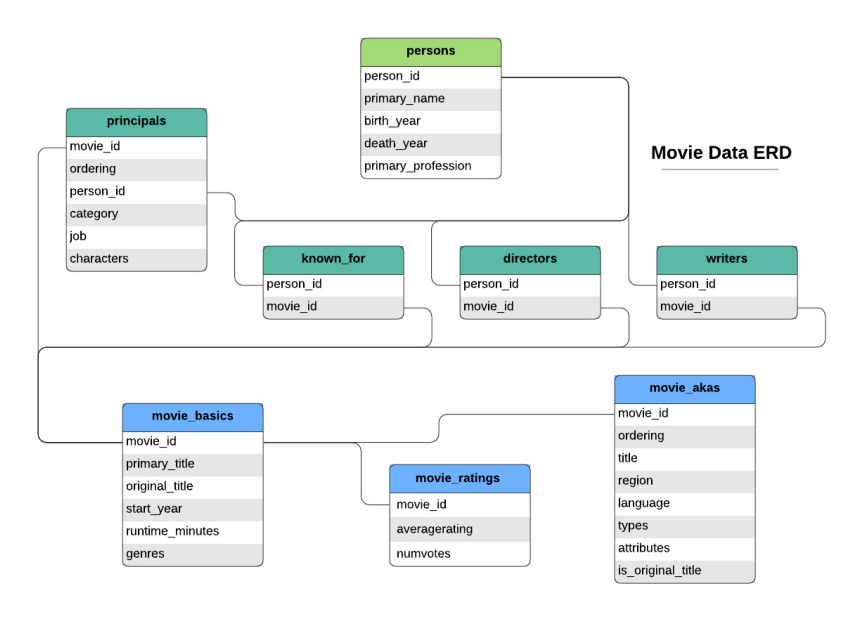

In [43]:
img = mpimg.imread('movie_data_erd.jpeg')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [44]:
conn = sqlite3.connect("im.db")

cur = conn.cursor()

movie_gross = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")

movie_budget = pd.read_csv("./zippedData/tn.movie_budgets.csv.gz")

reviews = pd.read_csv("./zippedData/rt.reviews.tsv.gz", sep='\t', encoding='ISO-8859-1')

movie_info = pd.read_csv("./zippedData/rt.movie_info.tsv.gz", sep='\t', encoding='ISO-8859-1')
# Define the path to the SQLite database
db_path = './zippedData/im.db'
# Create a connection to the SQLite database
conn = sqlite3.connect(db_path)
# Run a query to get all table names from the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

# Display the result (list of table names)
print(tables)

# Close the connection to the database when done
conn.close()

#pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


### Check Missing Values in Movie Info Dataset

In [45]:
movie_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [46]:
# Read the TSV file
movie_info = pd.read_csv("./zippedData/rt.movie_info.tsv.gz", sep='\t', encoding='ISO-8859-1')

# Get missing values count and percentage

missing_values = movie_info.isnull().sum()

missing_percentage = (movie_info.isnull().sum() / len(movie_info)) * 100

# Create a summary dataframe

missing_summary_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage})

# Sort by percentage missing
missing_summary = missing_summary_df.sort_values('Percentage Missing', ascending=False);

missing_summary

,Missing Values,Percentage Missing
currency,1220,78.205128
box_office,1220,78.205128
studio,1066,68.333333
writer,449,28.782051
theater_date,359,23.012821
dvd_date,359,23.012821
director,199,12.756410
synopsis,62,3.974359
runtime,30,1.923077
genre,8,0.512821


In [47]:
movie_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [48]:
movie_info.shape

(1560, 12)

In [49]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Cleaning the Dataset

In [50]:
# Drop columns with more than 50% missing values

cols_to_drop = missing_summary[missing_summary['Percentage Missing'] > 50].index

# Drop these columns
df_cleaned = movie_info.drop(columns=cols_to_drop)

#Fill categorical columns with mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Check if there are any remaining missing values
remaining_missing = df_cleaned.isnull().sum().sum()

print("\
Remaining Missing Values:", remaining_missing)

Remaining Missing Values: 0


In [51]:
df_cleaned.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [52]:
#Check individual columns for any missing values
df_cleaned.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [53]:
#Check the first five rows of the cleaned dataset
df_cleaned.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,A group of air crash survivors are stranded in...,NR,Drama|Romance,Rodney Bennett,Giles Cooper,"Jan 1, 1987","Jun 1, 2004",200 minutes


In [54]:
# split the genre column into a list of genres
df_cleaned['genre_list'] = df_cleaned['genre'].str.split('|')

# Explode to create a new row for each genre
df_cleaned_exploded = df_cleaned.explode('genre_list')

# Display the first few rows
df_cleaned_exploded.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Science Fiction and Fantasy


In [55]:
# Remove the genre_column
df_cleaned_exploded = df_cleaned_exploded.drop('genre', axis=1)

In [56]:
# Rename the genre_list column to genre
updated_df = df_cleaned_exploded.rename(columns={'genre_list': 'genre'})

updated_df.head(3)

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama


In [57]:
# Extract numeric values from the 'runtime' column
updated_df['runtime'] = updated_df['runtime'].str.extract('(\d+)').astype(float)

updated_df.head(2)

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Classics


### Checking the cleaned DataFrame Data Types

In [58]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3581 non-null   int64  
 1   synopsis      3581 non-null   object 
 2   rating        3581 non-null   object 
 3   director      3581 non-null   object 
 4   writer        3581 non-null   object 
 5   theater_date  3581 non-null   object 
 6   dvd_date      3581 non-null   object 
 7   runtime       3581 non-null   float64
 8   genre         3581 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 279.8+ KB


In [59]:
#Convert the dates to Date Time format
updated_df['theater_date'] = pd.to_datetime(df_cleaned_exploded['theater_date'])

updated_df['dvd_date'] = pd.to_datetime(df_cleaned_exploded['dvd_date'])

In [60]:
#Confirming the format has been updated

updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            3581 non-null   int64         
 1   synopsis      3581 non-null   object        
 2   rating        3581 non-null   object        
 3   director      3581 non-null   object        
 4   writer        3581 non-null   object        
 5   theater_date  3581 non-null   datetime64[ns]
 6   dvd_date      3581 non-null   datetime64[ns]
 7   runtime       3581 non-null   float64       
 8   genre         3581 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 279.8+ KB


### Check Missing Values in Movie Budget Dataset

In [61]:
# Get missing values count and pct

missing_values_budgets = movie_budget.isnull().sum()

missing_percentage_budgets = (movie_budget.isnull().sum() / len(movie_budget)) * 100

# Combine into a summary dataframe
missing_summary_budgets = pd.DataFrame({
    'Missing Values': missing_values_budgets,
    'Percentage Missing': missing_percentage_budgets})

missing_summary_budgets

,Missing Values,Percentage Missing
id,0,0.0
release_date,0,0.0
movie,0,0.0
production_budget,0,0.0
domestic_gross,0,0.0
worldwide_gross,0,0.0


In [62]:
#Checking the first 5 rows
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [63]:
#Remove the dollar sign from the numerical columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:

    movie_budget[col] = movie_budget[col].replace({'\\$': '', ',': ''}, regex=True).astype(float)

# Display the cleaned data types and head of the dataframe to confirm changes

print(movie_budget[['production_budget', 'domestic_gross', 'worldwide_gross']].head())

   production_budget  domestic_gross  worldwide_gross
0        425000000.0     760507625.0     2.776345e+09
1        410600000.0     241063875.0     1.045664e+09
2        350000000.0      42762350.0     1.497624e+08
3        330600000.0     459005868.0     1.403014e+09
4        317000000.0     620181382.0     1.316722e+09


In [64]:
#Check first five rows of movie_budget
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [65]:
# checking the data types of movie_budget
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [66]:
#Convert the release date to DateTime Format
movie_budget["release_date"] = pd.to_datetime(movie_budget['release_date'])

movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


### Checking Missing Values in the Movie Gross Dataset

In [67]:
# Load the dataset
movie_gross = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")

# Check missing values
missing_values = movie_gross.isnull().sum()

missing_percentage = (movie_gross.isnull().sum() / len(movie_gross)) * 100

# Create a summary dataframe
missing_summary_gross = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage})


missing_summary_gross

,Missing Values,Percentage Missing
title,0,0.000000
studio,5,0.147623
domestic_gross,28,0.826690
foreign_gross,1350,39.858282
year,0,0.000000


The dataset has missing values primarily in the foreign_gross column, with a smaller number in domestic_gross and studio

### Cleaning the dataset

To clean the data, I'll remove rows with missing values in the studio and domestic_gross columns due to their small number, and consider imputing or removing rows with missing foreign_gross values based on their impact on analysis.

In [68]:
# Remove rows with missing values in 'studio' and 'domestic_gross' columns
cleaned_movie_gross = movie_gross.dropna(subset=['studio', 'domestic_gross'])

# Making a copy of the DataFrame
cleaned_movie_gross = movie_gross.dropna(subset=['studio', 'domestic_gross']).copy()

# Fill Missing Values in 'foreign_gross' with 0
cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].fillna(0)

#Checking if there are any Missing Values
cleaned_movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [69]:
#Checking the Data Types of the Movie Gross Dataset
cleaned_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [70]:
#Convert the data type of foreign gross to numeric

cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].replace(',', '', regex=True).astype(float)

#Confirming the changes
cleaned_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


### The three Datasets namely Movie Gross, Movie Budget and Movie Info are now clean and ready for EDA

In [71]:
#Merging Movie_info Dataset with Movie_budget Dataset
merged_df = pd.merge(updated_df, movie_budget, on='id', how='inner')

#check for any missing values in merged_df
merged_df.isna().sum()

id                   0
synopsis             0
rating               0
director             0
writer               0
theater_date         0
dvd_date             0
runtime              0
genre                0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total revenue for each movie row-wise (add domestic and worldwide gross)
merged_df['total_revenue'] = merged_df['domestic_gross'] + merged_df['worldwide_gross']

print(merged_df['total_revenue'])

0        3.536853e+09
1        1.024468e+09
2        3.813129e+08
3        7.984080e+07
4        1.147141e+08
             ...     
10106    5.526140e+05
10107    3.439240e+05
10108    2.697200e+04
10109    0.000000e+00
10110    6.200000e+06
Name: total_revenue, Length: 10111, dtype: float64


In [73]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate profit by subtracting the production budget from the total revenue
merged_df['profit'] = merged_df['total_revenue'] - merged_df['production_budget'] 

print(merged_df['profit'])

0        3.111853e+09
1        8.494675e+08
2        2.363129e+08
3       -4.015920e+07
4        1.471407e+07
             ...     
10106   -4.473860e+05
10107   -3.060760e+05
10108   -4.230280e+05
10109   -2.500000e+05
10110    6.113000e+06
Name: profit, Length: 10111, dtype: float64


### Exploratory Data Analysis (EDA) 

##### Univariate Analysis

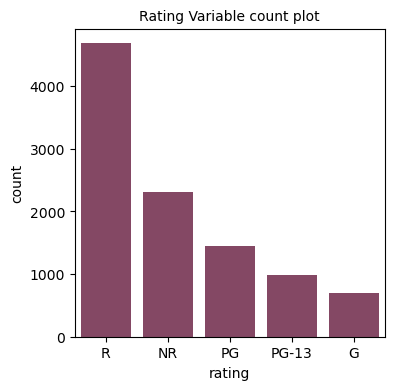

In [74]:
#i. which rating has the highest records
rating_count = merged_df['rating'].value_counts().index

#count plot for number of patient variable sns.
plt.figure(figsize=(4,4))
sns.countplot(x=merged_df['rating'], order= rating_count, color='#8E3E63')
plt.title('Rating Variable count plot', fontsize=10)
plt.show()

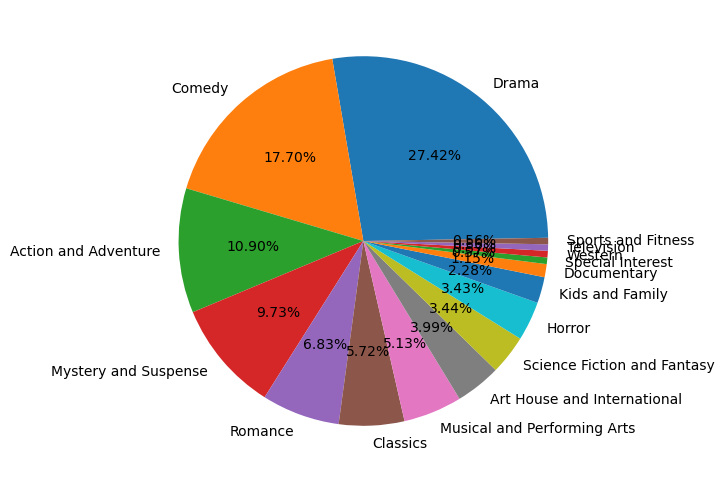

In [75]:
import matplotlib.pyplot as plt
# ii which is the highest between those with and those without genre

genre_count = merged_df['genre'].value_counts()

# Explode values should match the number of unique genres
explode = [0.0] * len(genre_count)  # Set explode for all slices, you can change 0.1 to other values if needed

#create a pie chart to visualize class column
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(genre_count, labels= genre_count.index, autopct='%0.2f%%', startangle= 1, explode=explode)
plt.show()



##### Bivariate Analysis

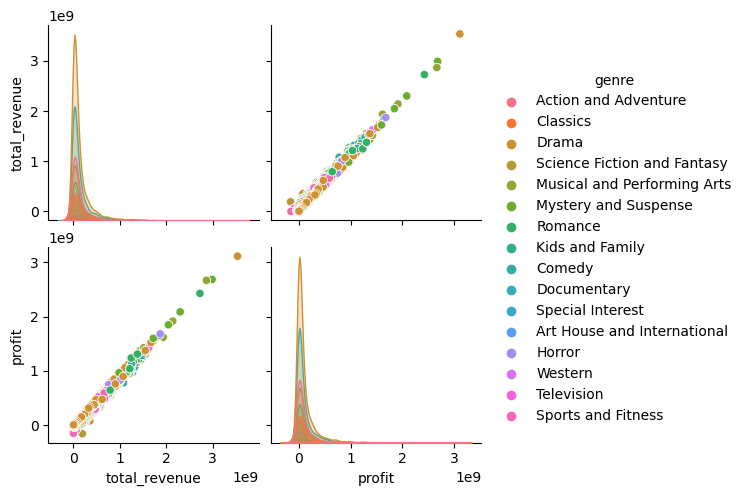

In [76]:
sns.pairplot(merged_df[['total_revenue', 'profit', 'genre']], hue='genre')
plt.show()

##### Findings
* Strong Positive Correlation:
There is a clear, strong positive linear relationship between total_revenue and profit, shown by the diagonal trend in the scatter plot. This indicates that as revenue increases, profit generally increases proportionally.

* Skewed Distribution:
Both total_revenue and profit are heavily right-skewed, with most movies having lower values for both metrics. A small number of movies achieve very high total revenue and profit, likely indicating highly successful movies films with substantial financial success.
The distribution plot shows that most movies do not reach high total revenue or profit, indicating that substantial financial success is uncommon.

* Genre-Based Trends:
Certain genres, such as Drama (orange) and Science Fiction and Fantasy (green), are more likely to achieve higher total revenue and profit, as these points appear more frequently among the higher values.
Other genres, like Documentary and Special Interest, are mostly clustered near the lower end of total revenue and profit, suggesting limited financial performance for these genres.
Action and Adventure and Science Fiction and Fantasy appear to achieve high values, showing these genres might have greater potential for profitability and revenue.


##### Multivariate Analysis

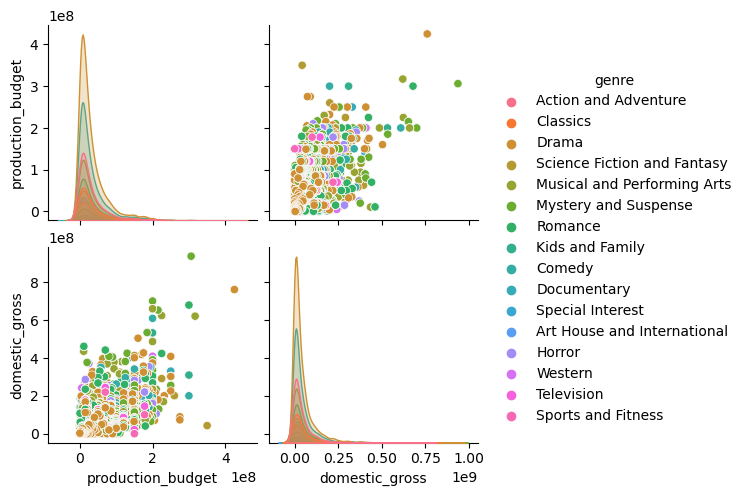

In [77]:
sns.pairplot(merged_df[['production_budget', 'domestic_gross', 'genre']], hue='genre')
plt.show()

##### Findings
* Budget and Revenue Correlation: There is a general positive relationship between production budget and domestic gross, though not all high-budget films guarantee high domestic revenue.
* Genre Influence: Genres such as Action and Adventure and Science Fiction and Fantasy are associated with both high production budgets and potentially high domestic grosses, possibly due to broader commercial appeal. In contrast, genres like Documentary and Special Interest tend to have smaller budgets and lower domestic revenue, likely reflecting niche markets.
* Skewed Distribution: Most movies have relatively low production budgets and domestic grosses, with only a few movies achieving very high values in either category.

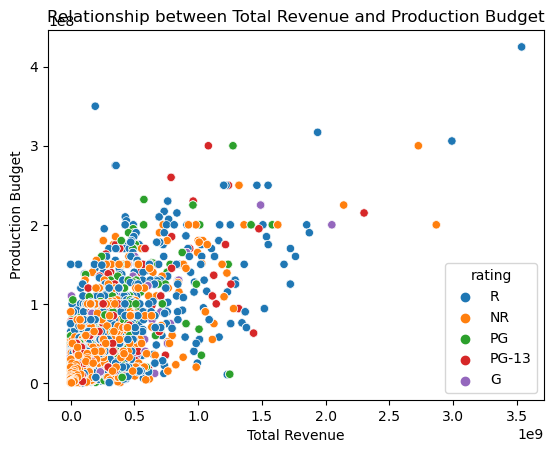

In [78]:

# Plot the relationship between total_revenue and production_budget
sns.scatterplot(x='total_revenue', y='production_budget', hue='rating', data=merged_df)

# Display the plot
plt.title('Relationship between Total Revenue and Production Budget')
plt.xlabel('Total Revenue')
plt.ylabel('Production Budget')
plt.show()


##### Finding
 * The higher production budgets generally correlate with higher total revenue, most movies fall within a lower budget and revenue range. Outliers with high budgets and revenue are exceptional cases, likely representing blockbuster films. Ratings don’t show a strong correlation with production budgets or revenue in this plot.